# Planar data classification with one hidden layer

Welcome to your week3 programming assignment. It's time to build your first neural network, which will have a hidden layer. You will see a big difference between this model and the one you implemented using logistic regression.

**You will learn how to:**
- Implement a 2-class classification neural network with a single hidden layer
- Use units with a non-linear activation function, such as tanh
- Compute the cross entropy loss
- Implement forward and backward propagation

## 1 - Packages

Let's first import all the packages that you will need during this assignment.
- `testCase` provides some test examples to assess the correctness of your functions
- `planar_utils` provide various useful functions used in this assignment

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

## 2 - Dataset

First, let's get the dataset you will work on. The following code will load a "flower" 2-class dataset into variables $X$ and $Y$.

In [5]:
X, Y = load_planar_dataset()

Visualize the dataset using matplotlib. The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. Your goal is to build a model to fit this data.

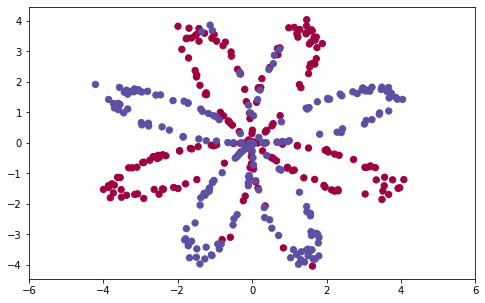

In [6]:
# Visualization the data:
plt.figure(figsize=(8, 5))
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral)
plt.xlim(-6, 6);

You have:

    - a numpy-array (matrix) X that contains your features (x1, x2)
    - a numpy-array (vector) Y that contains your labels (red:0, blue:1).
    

Let's first get a better sense of what our data is like.

**Exercise:** How many training examples do you have? In addition, what is the `shape` of the variables $X$ and $Y$?

In [7]:
### START CODE HERE ###
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)
print('# training examples:', X.shape[1])

Shape of X: (2, 400)
Shape of Y: (1, 400)
# training examples: 400


## 3 - Simple Logistic Regression

Before building a full neural network, let's first see how logistic regression performs on this problem. You can use sklearn's built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.

In [8]:
# Train the logistic regression lassifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

C:\Users\gjai_kmj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

You can now plot the decision boundary of these models. Run the code below.

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


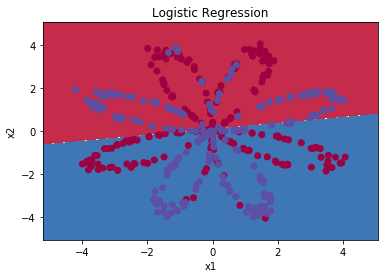

In [9]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y[0])
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) +
       '% ' + "(percentage of correctly labelled datapoints)")

**Interpretation**: The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better. Let's try this now!


## 4 - Neural Network model

Logistic regression did not work well on the "flower dataset". You are going to train a Neural Network with a single hidden layer.

**Here is our model**:
<img src="images/classification_kiank.png" style="width:600px;height:300px;">

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learn the right parameters, you can make predictions on new data.

### 4.1 - Defining the neural network structure

**Exercise:** Define three variables:
    - n_x: the size of the input layer
    - n_h: the size of the hidden layer (set this to 4)
    - n_y: the size of the output layer
    
**Hint:** Use hspaes of X and Y to find n_x and n_y. Also, hard code the hidden layer size to be 4.

In [10]:
def layer_sizes(X, Y):
    
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return n_x, n_h, n_y

In [11]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


### 4.2 - Initialize the model's paramters

**Exercise:** Implement the function `initialize_parameters()`.

**Instrucdtions:**
- Make sure your parameters' sizes are right. Refer to the neural network figure above if neede.
- You will initialize the weights matrices with random values.
    - Use: `np.random.randn(a, b) * 0.01` to randomly initialize a matrix of shape (a, b).
- You will initialize the bias vectors as zeros.
    - Use: `np.zeros((a, b))` to initialize a matrix of shape (a, b) with zeros.

In [12]:
def initialize_parameters(n_x, n_h, n_y):
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    return parameters

In [13]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01144724  0.00901591]
 [ 0.00502494  0.00900856]
 [-0.00683728 -0.0012289 ]
 [-0.00935769 -0.00267888]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 0.00530355 -0.00691661 -0.00396754 -0.00687173]]
b2 = [[0.]]


### 4.3 - The Loop

**Question:** Implement `forward_propagation()`.

**Instructions:**
- Look above at the mathematical representation of your classifier.
- You can use the function `sigmoid()`. It is built-in (imported) in the notebook.
- You can use the function `np.tanh()`. It's part of the numpy library.
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set). -- 여러개 샘플 주어졌을 때 한 번에 계산할 수 있게 만들어라.
- Values needed in the backpropagation are stored in "`cache`". The `cache` will be given as an input to the backpropagation function.

In [14]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.matmul(W1, X) + b1 # np.matmul == np.dot
    A1 = np.tanh(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    
    cache = {
        'Z1': Z1,
        'Z2': Z2,
        'A1': A1,
        'A2': A2
    }
    return A2, cache

In [15]:
X_assess, parameters = forward_propagation_test_case()

A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


Now that you have computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for every example, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

**Exercise**: Implement `compute_cost()` to compute the value of the cost $J$.

**Instructions**:
- There are many ways to implement the cross-entropy loss. To help you, we give you how we would have implemented
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # no need to use a for loop!
```

(you can use either `np.multiply()` and then `np.sum()` or directly `np.dot()`).

In [43]:
def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = (-1/m)*(np.dot(Y, np.log(A2).T) + np.dot(1-Y, np.log(1-A2).T))
    cost = np.squeeze(cost)  # E.g., turns [[17]] into 17
    
#     assert(isinstance(cost, float))

    return float(cost)

In [44]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess)))

cost = 0.6930587610394646


Using the cache computed during forward propagation, you can now implement backward propagation. 

**Question:** Implement the function `backward_propagation()`.

**Instructions:** Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.
<img src="images/grad_summary.png" style="width:600px;height:300px;">

- Tips:
    - To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute 
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

In [52]:
def backward_propagation(X, Y, cache, parameters):
    
    m = X.shape[1]
    A1 = cache['A1']
    A2 = cache['A2']
    W1 = parameters['W1']
    W2 = parameters['W2']

    
    dZ2 = A2 - Y
    dW2 = (1/m)*np.matmul(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.matmul(W2.T, dZ2) * (1-np.power(A1, 2))
    dW1 = (1/m)*np.matmul(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        'dZ2':dZ2, 
        'dW2':dW2,
        'db2':db2,
        'dZ1':dZ1,
        'dW1':dW1,
        'db1':db1
    }
    return grads

In [54]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(X_assess, Y_assess, cache, parameters)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


**Question**: Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

**General gradient descent rule**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

**Illustration**: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.

<img src="images/sgd.gif" style="width:400;height:400;"> <img src="images/sgd_bad.gif" style="width:400;height:400;">



In [55]:
def update_parameters(parameters, grads, learning_rate=1.2):
    
    W1 = parameters['W1'] - learning_rate * grads['dW1']
    W2 = parameters['W2'] - learning_rate * grads['dW2']
    b1 = parameters['b1'] - learning_rate * grads['db1']
    b2 = parameters['b2'] - learning_rate * grads['db2']
    
    parameters = {
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2
    }
    
    return parameters

In [56]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


### 4.4 - Integrate parts 4.1, 4.2 and 4.3 in `nn_model()`

**Question:** Build your neural network model in `nn_model()`.
**Instructions:** The neural network model has to use the previous functions in the right order. 

In [84]:
def nn_model(X, Y, n_h, epochs=10000, learning_rate=1.2, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # 파라미터 초기화
    params = initialize_parameters(n_x, n_h, n_y)

    for epoch in range(epochs):
        # 순전파------------------------------------------
        A2, cache = forward_propagation(X, params)
        # cost--------------------------------------------
        cost = compute_cost(A2, Y)
        # 역전파------------------------------------------
        grads = backward_propagation(X, Y, cache, params)
        # update params-----------------------------------
        params = update_parameters(params, grads, learning_rate)
        
        if print_cost and (epoch % 1000 == 0):
            print("Cost after {}th iteration : {:.6f}".format(epoch+1, cost))
    

    return params

In [85]:
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, epochs=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after 1th iteration : 0.693198
Cost after 1001th iteration : 0.000219
Cost after 2001th iteration : 0.000108
Cost after 3001th iteration : 0.000071
Cost after 4001th iteration : 0.000053
Cost after 5001th iteration : 0.000043
Cost after 6001th iteration : 0.000035
Cost after 7001th iteration : 0.000030
Cost after 8001th iteration : 0.000027
Cost after 9001th iteration : 0.000024
W1 = [[ 0.56305445 -1.03925886]
 [ 0.7345426  -1.36286875]
 [-0.72533346  1.33753027]
 [ 0.74757629 -1.38274074]]
b1 = [[-0.22240654]
 [-0.34662093]
 [ 0.33663708]
 [-0.35296113]]
W2 = [[ 1.82196893  3.09657075 -2.98193564  3.19946508]]
b2 = [[0.21344644]]


### 4.5 - Predictions

**Question:** Use your model to predict by building `predict()`. Use forward propagation to predict results. 

**Reminder**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    
As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: ```X_new = (X > threshold)```

In [87]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)

    predictions = np.round(A2)
 
    return predictions

In [88]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


It's time to run the model and see how it performs on a planar dataset. Run the following code to test your model with a single hidden layer of $n_h$ hidden units.

In [94]:
params

{'W1': array([[ 11.45753676,  -3.41713075],
        [  0.1580534 ,  -9.70576973],
        [ 11.49968112,  13.45174838],
        [  9.25498481, -10.19974607]]),
 'b1': array([[ 0.39374262],
        [-0.09959337],
        [ 0.03547642],
        [ 0.09107878]]),
 'W2': array([[ -3.45826866, -11.99167371,  -6.12698488,  10.56949614]]),
 'b2': array([[-0.05423241]])}

Cost after 1th iteration : 0.693162
Cost after 1001th iteration : 0.258625
Cost after 2001th iteration : 0.239334
Cost after 3001th iteration : 0.230802
Cost after 4001th iteration : 0.225528
Cost after 5001th iteration : 0.221845
Cost after 6001th iteration : 0.219094
Cost after 7001th iteration : 0.220884
Cost after 8001th iteration : 0.219483
Cost after 9001th iteration : 0.218548


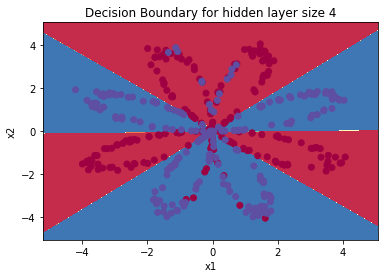

In [100]:
# planar data : X, Y
# 모델 생성 with 4-dimensional hidden layer(1 hidden layer)
params = nn_model(X, Y, n_h=4, print_cost=True)

plot_decision_boundary(lambda x: predict(params, x.T), X, Y[0])
plt.title("Decision Boundary for hidden layer size " + str(4));

In [103]:
# Print accuracy
predictions = predict(params, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 90%


Accuracy is really high compared to Logistic Regression(47%). The model haslearned the leaf patterns of the flower! Neural networks are able to learn even highly non-linear decision boundaries, unlike logistic regression. 

Now, let's try out several hidden layer sizes.

### 4.6 - Tuning hidden layer size

Run the folllowing code. It may take 1-2 minutes. You will observe different behaviors of the model for various hidden layer sizes.

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 91.0 %
Accuracy for 50 hidden units: 90.5 %


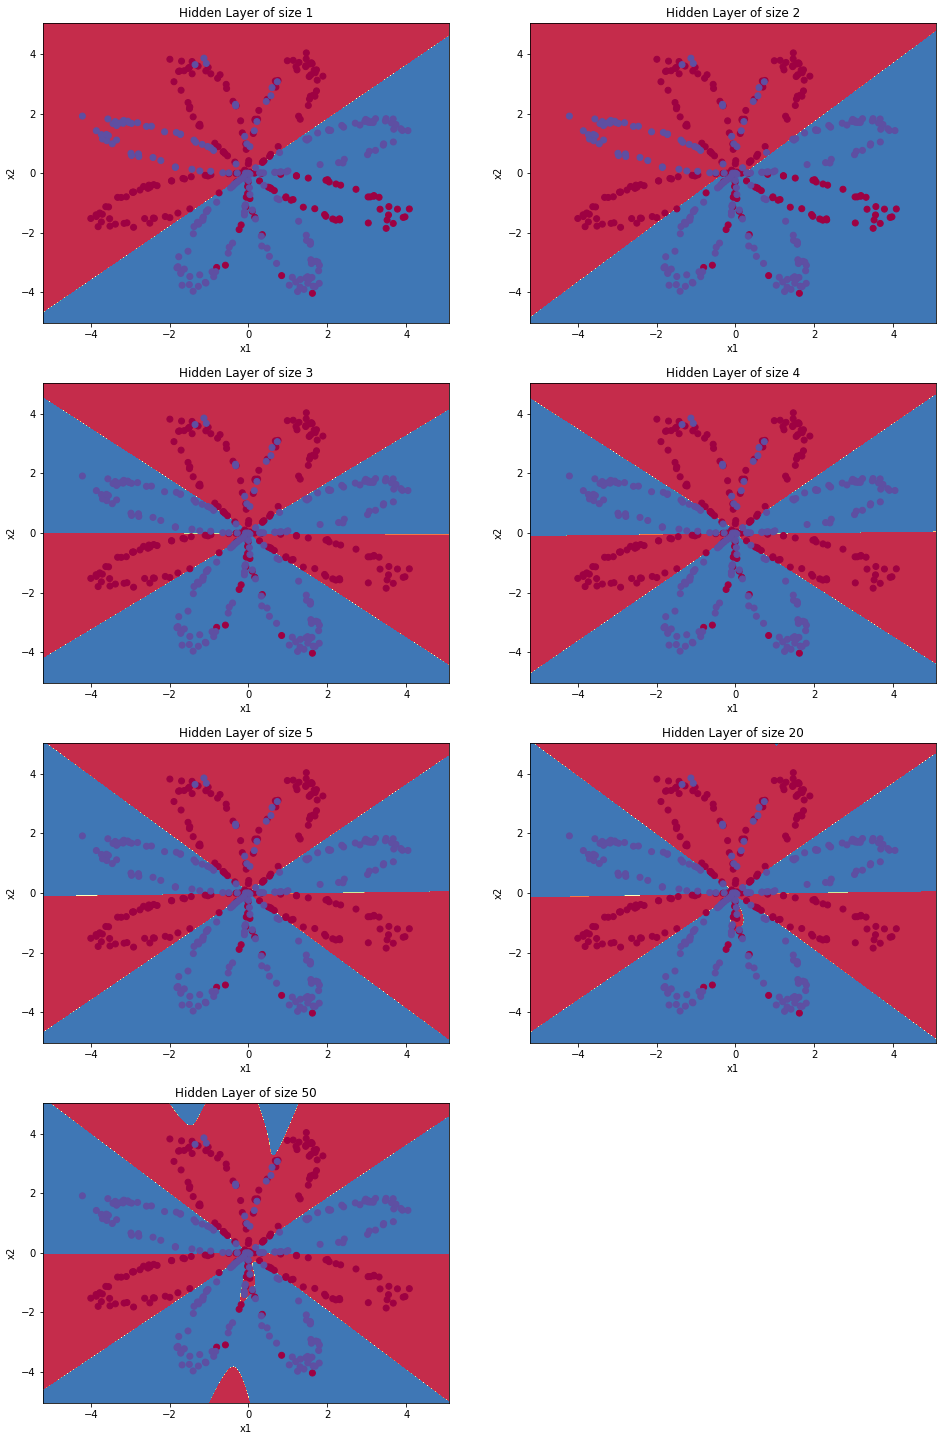

In [106]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, epochs=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0])
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**Interpretation:**
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data.
- The best hidden layer size seems to be around n_h = 5. Indeed, a value around here seeams to fits the data well without also incurring noticable overfitting.
- You will also learn later about regularization, which lets you use very large models (such as n_h = 50) without much overfitting.

**Questions:**

Some optional questions that you can explore if you wish:
- tanh 활성화 함수를 sigmoid나 ReLU로 바꾸면 어떻게 될까?
- learning rate을 바꾸면 어떻게 될까?
- dataset이 달라지면 어떨까? 잘 작동할까?(아래에서 확인할 것)

**You've learned to:**
- Build a complete neural network with a hidden layer
- Make a good use of a non-linear unit
- Implemented forward propagation and backpropagation, and trained a neural network
- See the impact of varing the hidden layer size, including overfitting.

Nice work!

## 5 - Performance on other datasets

If you want, you can rerun the whole notebook (minus the dataset part) for each of the following datasets.

In [142]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### 5.1 - noisy_circles

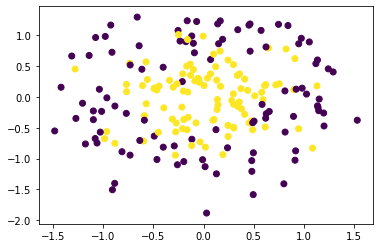

In [143]:
X, Y = datasets['noisy_circles']
plt.scatter(X[:, 0], X[:, 1], c=Y);

Cost after 1th iteration : 0.693147
Cost after 1001th iteration : 0.685409
Cost after 2001th iteration : 0.385996
Cost after 3001th iteration : 0.375470
Cost after 4001th iteration : 0.374599
Cost after 5001th iteration : 0.371805
Cost after 6001th iteration : 0.369904
Cost after 7001th iteration : 0.368508
Cost after 8001th iteration : 0.367410
Cost after 9001th iteration : 0.366522


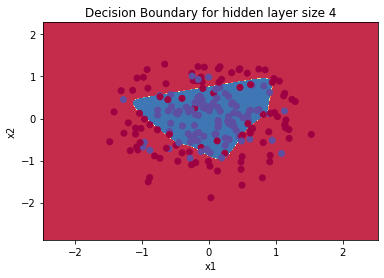

In [144]:
X = X.T
Y = Y.reshape(1, -1)
params_circles = nn_model(X, Y, n_h=4, print_cost=True)

plot_decision_boundary(lambda x: predict(params_circles, x.T), X, Y[0])
plt.title("Decision Boundary for hidden layer size " + str(4));

In [147]:
predictions = predict(params_circles, X)
accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
print ("Accuracy for noisy_circle: {} %".format(accuracy))

Accuracy for noisy_circle: 84.5 %


### 5.2 - noisy_moons

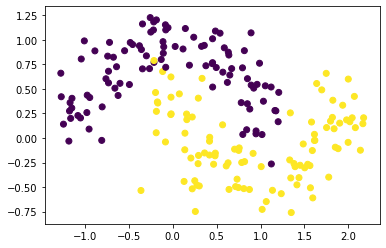

In [148]:
X, Y = datasets['noisy_moons']
plt.scatter(X[:, 0], X[:, 1], c=Y);

Cost after 1th iteration : 0.693157
Cost after 1001th iteration : 0.320053
Cost after 2001th iteration : 0.312017
Cost after 3001th iteration : 0.047967
Cost after 4001th iteration : 0.040920
Cost after 5001th iteration : 0.038085
Cost after 6001th iteration : 0.036551
Cost after 7001th iteration : 0.035552
Cost after 8001th iteration : 0.034818
Cost after 9001th iteration : 0.034234


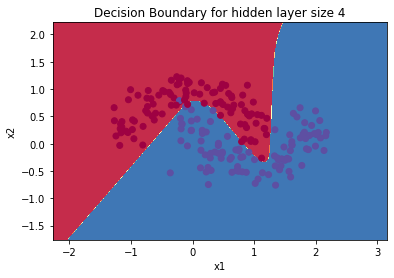

In [149]:
X = X.T
Y = Y.reshape(1, -1)
params_moons = nn_model(X, Y, n_h=4, print_cost=True)

plot_decision_boundary(lambda x: predict(params_moons, x.T), X, Y[0])
plt.title("Decision Boundary for hidden layer size " + str(4));

In [150]:
predictions = predict(params_moons, X)
accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
print ("Accuracy for noisy_moons: {} %".format(accuracy))

Accuracy for noisy_moons: 99.0 %


### 5.3 - blobs

- multiclass

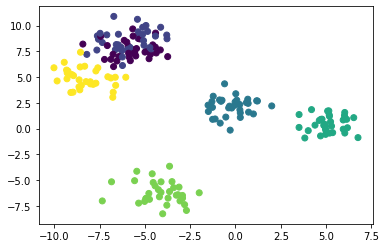

In [151]:
X, Y = datasets['blobs']
plt.scatter(X[:, 0], X[:, 1], c=Y);

Cost after 1th iteration : 0.692461
Cost after 1001th iteration : 0.652780
Cost after 2001th iteration : 0.613278
Cost after 3001th iteration : 0.573944
Cost after 4001th iteration : 0.534767
Cost after 5001th iteration : 0.495736
Cost after 6001th iteration : 0.456838
Cost after 7001th iteration : 0.418062
Cost after 8001th iteration : 0.379394
Cost after 9001th iteration : 0.340820


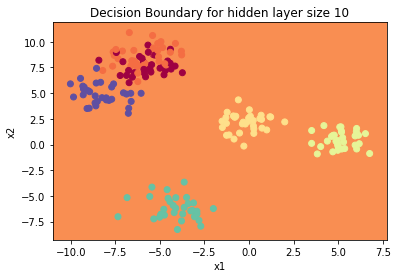

In [159]:
# X = X.T
# Y = Y.reshape(1, -1)
nh=10
params_blobs = nn_model(X, Y, n_h=nh, learning_rate=0.00001, print_cost=True)

plot_decision_boundary(lambda x: predict(params_blobs, x.T), X, Y[0])
plt.title("Decision Boundary for hidden layer size " + str(nh));

In [160]:
predictions = predict(params_blobs, X)
accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
print ("Accuracy for noisy_moons: {} %".format(accuracy))

Accuracy for noisy_moons: 248.0 %


### 5.4 - gaussian_quantiles

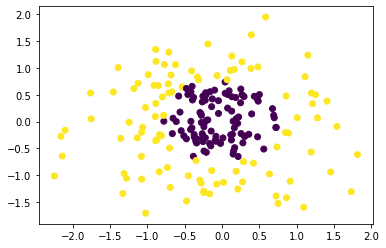

In [167]:
X, Y = datasets['gaussian_quantiles']
plt.scatter(X[:, 0], X[:, 1], c=Y);

Cost after 1th iteration : 0.693150
Cost after 1001th iteration : 0.084336
Cost after 2001th iteration : 0.059518
Cost after 3001th iteration : 0.048341
Cost after 4001th iteration : 0.041846
Cost after 5001th iteration : 0.037119
Cost after 6001th iteration : 0.032301
Cost after 7001th iteration : 0.025411
Cost after 8001th iteration : 0.021778
Cost after 9001th iteration : 0.020172


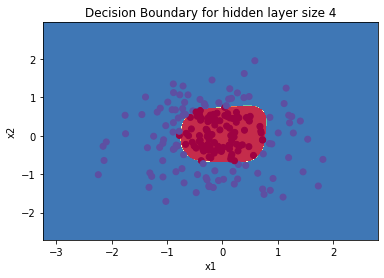

In [170]:
X = X.T
Y = Y.reshape(1, -1)
nh=4
params_gq = nn_model(X, Y, n_h=nh,print_cost=True)

plot_decision_boundary(lambda x: predict(params_gq, x.T), X, Y[0])
plt.title("Decision Boundary for hidden layer size " + str(nh));

In [171]:
predictions = predict(params_gq, X)
accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
print ("Accuracy for noisy_moons: {} %".format(accuracy))

Accuracy for noisy_moons: 99.5 %
